In [32]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests

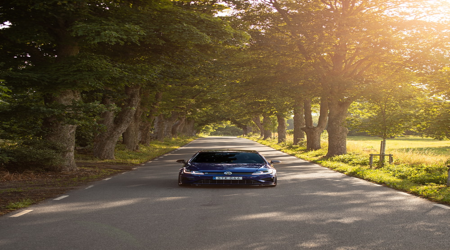

In [33]:
image = Image.open('car.jfif')
image = image.resize((450,250))
image_arr = np.array(image)
image

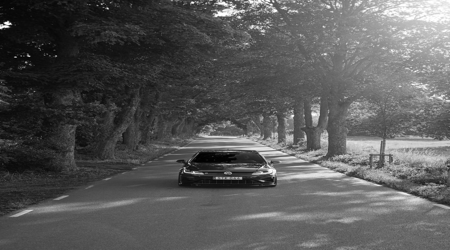

In [34]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

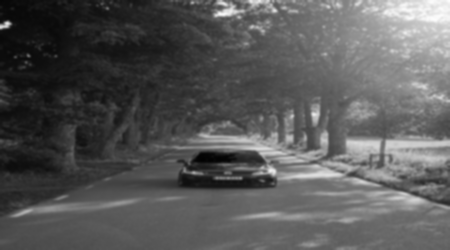

In [35]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

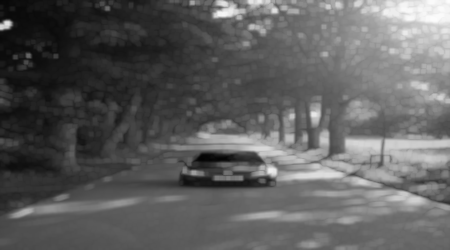

In [36]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

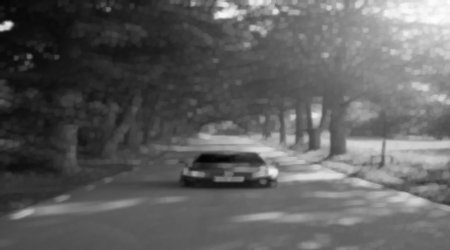

In [37]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [38]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[211, 151,  54,  54],
       [140,  78, 163, 163]])

2  cars found


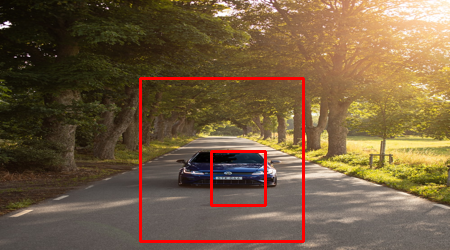

In [39]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

In [31]:
# Reading image form url
image2 = Image.open(requests.get('https://qph.fs.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85', stream=True).raw)
image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2,cv2.COLOR_BGR2GRAY)

In [20]:
bus_cascade_src = 'Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)

1  bus's found


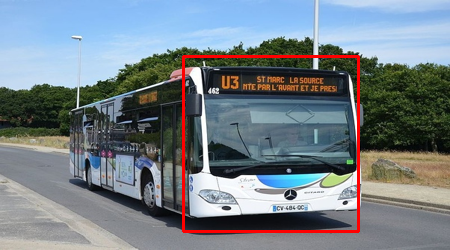

In [21]:
cnt = 0
for (x,y,w,h) in bus:
    cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " bus's found")
Image.fromarray(image_arr2)